--- ENGLISH ---
Total tokens (full text): 360
Total words: 293
Average tokens per word: 1.307
% words with 1 token: 74.1%
% words with 2 tokens: 21.5%
% words with 3+ tokens: 4.4%

--- SPANISH ---
Total tokens (full text): 588
Total words: 355
Average tokens per word: 1.777
% words with 1 token: 46.5%
% words with 2 tokens: 31.8%
% words with 3+ tokens: 21.7%

--- POLISH ---
Total tokens (full text): 762
Total words: 286
Average tokens per word: 2.731
% words with 1 token: 19.9%
% words with 2 tokens: 25.5%
% words with 3+ tokens: 54.5%

Example token splits for selected words:

ENGLISH:
  prose -> tokens (2): ['pro', 'se']
  rhythm -> tokens (2): ['r', 'hythm']
  poetry -> tokens (2): ['po', 'etry']
  metre -> tokens (2): ['met', 're']
  conventions -> tokens (2): ['con', 'ventions']

SPANISH:
  prosa -> tokens (2): ['pro', 'sa']
  ritmo -> tokens (2): ['rit', 'mo']
  poesía -> tokens (3): ['po', 'es', 'ía']
  métrica -> tokens (4): ['m', 'é', 'tr', 'ica']
  convenciones -> tokens (3)

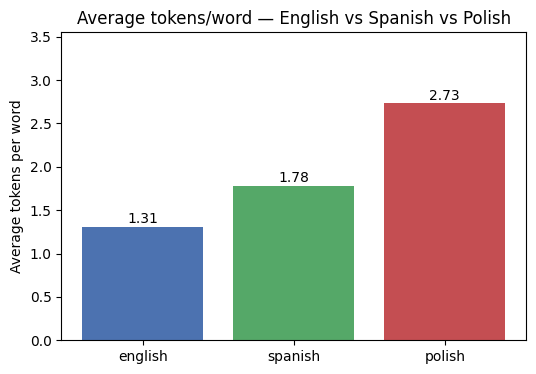


Mini write-up:

ENGLISH: avg tokens/word = 1.307, 1-token% = 74.1, 2-token% = 21.5, 3+% = 4.4

SPANISH: avg tokens/word = 1.777, 1-token% = 46.5, 2-token% = 31.8, 3+% = 21.7

POLISH: avg tokens/word = 2.731, 1-token% = 19.9, 2-token% = 25.5, 3+% = 54.5


In [4]:
# According to Copilot these are the libraries and functions I need to import
import json
import re
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt

# Trying to import tiktoken (OpenAI tokenizer helper)
try:
    import tiktoken
except Exception as e:
    raise SystemExit(
        "This script requires the 'tiktoken' package. Install with: pip install tiktoken\n"
        "Error: " + str(e)
    )

# The three texts
english = (
    "Prose is language that follows the natural flow or rhythm of speech, ordinary grammatical structures, or, in writing, typical conventions and formatting. "
    "Thus, prose ranges from informal speaking to formal academic writing. Prose differs most notably from poetry, which follows some type of intentional, contrived, artistic structure. "
    "Poetic structures vary dramatically by language; in English poetry, language is often organized by a rhythmic metre and a rhyme scheme.\n\n"
    "The ordinary conversational language of a region or community, and many other forms and styles of language usage, fall under prose, a label that can describe both speech and writing. "
    "In writing, prose is visually formatted differently than poetry. Poetry is traditionally written in verse: a series of lines on a page, parallel to the way that a person would highlight the structure orally if saying the poem aloud; for example, poetry may end with a rhyme at the end of each line, making the entire work more melodious or memorable. "
    "Prose uses writing conventions and formatting that may highlight meaning—for instance, the use of a new paragraph for a new speaker in a novel—but does not follow any special rhythmic or other artistic structure.\n\n"
    "The word \"prose\" first appeared in English in the 14th century. It is derived from the Old French prose, which in turn originates in the Latin expression prosa oratio (literally, straightforward or direct speech).[1] "
    "In highly-literate cultures where spoken rhetoric is considered relatively unimportant, definitions of prose may be narrower, including only written language (but including written speech or dialogue). In written languages, spoken and written prose usually differ sharply. "
    "Sometimes, these differences are transparent to those using the languages; linguists studying extremely literal transcripts for conversation analysis see them, but ordinary language-users are unaware of them."
)

spanish = (
    "La prosa es el lenguaje que sigue el flujo o ritmo natural del habla, las estructuras gramaticales ordinarias o, en la escritura, las convenciones y el formato típicos. "
    "Por lo tanto, la prosa abarca desde el habla informal hasta la escritura académica formal. La prosa se diferencia notablemente de la poesía, que sigue algún tipo de estructura artística intencional y elaborada. "
    "Las estructuras poéticas varían drásticamente según el idioma; en la poesía inglesa, el lenguaje suele organizarse mediante una métrica rítmica y un esquema de rima.\n\n"
    "El lenguaje coloquial habitual de una región o comunidad, así como muchas otras formas y estilos de uso del lenguaje, se engloban dentro de la prosa, una etiqueta que puede describir tanto el habla como la escritura. "
    "En la escritura, la prosa se formatea visualmente de manera diferente a la poesía. La poesía se escribe tradicionalmente en verso: una serie de líneas en una página, paralelas a la forma en que una persona resaltaría la estructura oralmente al recitar el poema en voz alta; por ejemplo, un poema puede terminar con una rima al final de cada verso, lo que hace que la obra sea más melódica o memorable. "
    "La prosa emplea convenciones de escritura y formato que pueden resaltar el significado —por ejemplo, el uso de un nuevo párrafo para un nuevo personaje en una novela—, pero no sigue ninguna estructura rítmica ni artística específica.\n\n"
    "La palabra «prosa» apareció por primera vez en inglés en el siglo XIV. Proviene del francés antiguo «prose», que a su vez tiene su origen en la expresión latina «prosa oratio» (literalmente, discurso directo o sin rodeos).[1] "
    "En culturas con un alto nivel de alfabetización, donde la retórica oral se considera relativamente poco importante, las definiciones de prosa pueden ser más restringidas, incluyendo únicamente el lenguaje escrito (pero abarcando también el discurso o diálogo escrito). "
    "En las lenguas escritas, la prosa oral y la escrita suelen diferir notablemente. A veces, estas diferencias son imperceptibles para quienes usan las lenguas; los lingüistas que estudian transcripciones extremadamente literales para el análisis de conversaciones las perciben, pero los hablantes comunes no son conscientes de ellas."
)

polish = (
    "Proza to język, który podąża za naturalnym przepływem lub rytmem mowy, zwykłymi strukturami gramatycznymi lub, w piśmie, typowymi konwencjami i formatowaniem. "
    "Zatem proza ​​rozciąga się od nieformalnej mowy po formalne teksty akademickie. Proza różni się przede wszystkim od poezji, która podąża za pewnego rodzaju celową, wymyśloną, artystyczną strukturą. "
    "Struktury poetyckie różnią się znacząco w zależności od języka; w poezji angielskiej język jest często zorganizowany za pomocą rytmicznego metrum i schematu rymów.\n\n"
    "Zwykły język potoczny danego regionu lub społeczności, a także wiele innych form i stylów użycia języka, zalicza się do prozy, etykiety, która może opisywać zarówno mowę, jak i pismo. "
    "W piśmie proza ​​jest formatowana wizualnie inaczej niż poezja. Poezję tradycyjnie pisze się wierszem: serią wersów na stronie, równoległą do sposobu, w jaki osoba recytująca wiersz podkreślałaby jego strukturę ustnie; na przykład poezja może kończyć się rymem na końcu każdego wersu, co czyni cały utwór bardziej melodyjnym lub łatwym do zapamiętania. "
    "Proza wykorzystuje konwencje pisarskie i formatowanie, które mogą podkreślać znaczenie – na przykład użycie nowego akapitu dla nowego mówcy w powieści – ale nie stosuje żadnej specjalnej struktury rytmicznej ani innej struktury artystycznej.\n\n"
    "Słowo „proza” pojawiło się po raz pierwszy w języku angielskim w XIV wieku. Pochodzi od starofrancuskiego słowa prose, które z kolei wywodzi się z łacińskiego wyrażenia prosa oratio (dosłownie: mowa bezpośrednia lub bezpośrednia).[1] "
    "W kulturach o wysokim poziomie piśmiennictwa, gdzie retoryka mówiona jest uważana za stosunkowo mało istotną, definicje prozy mogą być węższe, obejmując jedynie język pisany (ale uwzględniając mowę pisaną lub dialog). "
    "W językach pisanych proza ​​mówiona i pisana zazwyczaj znacznie się różnią. Czasami różnice te są niewidoczne dla osób posługujących się tymi językami; językoznawcy badający dosłowne transkrypcje pod kątem analizy konwersacji je dostrzegają, ale zwykli użytkownicy języka nie są ich świadomi."
)

#  Helper functions: tokenization and word splitting
def get_encoding(name="helper"):
    try:
        enc = tiktoken.get_encoding(name)
    except Exception:
        # fallback to encoding_for_model (if available)
        try:
            enc = tiktoken.encoding_for_model("gpt-4")
        except Exception:
            raise SystemExit("Could not get a tokenizer encoding. Check tiktoken installation.")
    return enc

ENC = get_encoding()

def tokens_for_text(text):
    """
    Return:
      - token_texts: list of token text pieces (strings)
      - token_ids: list of token ids (ints)
    """
    ids = ENC.encode(text)
    token_texts = [ENC.decode([i]) for i in ids]
    return token_texts, ids

# Word splitter: words include letters and apostrophes, numbers also included.
WORD_RE = re.compile(r"\b\w[\w'’\-]*\b", flags=re.UNICODE)

def words_from_text(text):
    return WORD_RE.findall(text)

def word_token_stats(text):
    words = words_from_text(text)
    per_word_token_counts = []
    per_word_token_texts = []
    for w in words:
        ids = ENC.encode(w)
        per_word_token_texts.append([ENC.decode([i]) for i in ids])
        per_word_token_counts.append(len(ids))
    total_tokens = sum(per_word_token_counts)
    total_words = len(words)
    if total_words == 0:
        avg_tokens = 0
    else:
        avg_tokens = total_tokens / total_words
    counts = Counter(per_word_token_counts)
    # percentages:
    pct_1 = 100 * (counts.get(1, 0) / total_words) if total_words else 0
    pct_2 = 100 * (counts.get(2, 0) / total_words) if total_words else 0
    pct_3p = 100 * (sum(v for k, v in counts.items() if k >= 3) / total_words) if total_words else 0
    return {
        "total_words": total_words,
        "total_tokens": total_tokens,
        "avg_tokens_per_word": avg_tokens,
        "%_1_token_words": pct_1,
        "%_2_token_words": pct_2,
        "%_3plus_token_words": pct_3p,
        "per_word_token_counts": per_word_token_counts,
        "per_word_token_texts": per_word_token_texts,
        "words": words,
    }

# Tokenizing full texts and collect data
languages = {
    "english": english,
    "spanish": spanish,
    "polish": polish,
}

results = {}
for lang, txt in languages.items():
    token_texts, token_ids = tokens_for_text(txt)
    stats = word_token_stats(txt)
    results[lang] = {
        "full_text": txt,
        "token_texts": token_texts,
        "token_ids": token_ids,
        "stats": stats,
    }
    # printing a short summary:
    print(f"--- {lang.upper()} ---")
    print(f"Total tokens (full text): {len(token_ids)}")
    print(f"Total words: {stats['total_words']}")
    print(f"Average tokens per word: {stats['avg_tokens_per_word']:.3f}")
    print(f"% words with 1 token: {stats['%_1_token_words']:.1f}%")
    print(f"% words with 2 tokens: {stats['%_2_token_words']:.1f}%")
    print(f"% words with 3+ tokens: {stats['%_3plus_token_words']:.1f}%")
    print()

# Picking 5 example words per language and show tokenizer splits
example_words = {
    "english": ["prose", "rhythm", "poetry", "metre", "conventions"],
    "spanish": ["prosa", "ritmo", "poesía", "métrica", "convenciones"],
    "polish": ["proza", "rytmem", "poezji", "akapitu", "konwencje"],
}

print("Example token splits for selected words:")
for lang, words in example_words.items():
    print(f"\n{lang.upper()}:")
    for w in words:
        ids = ENC.encode(w)
        pieces = [ENC.decode([i]) for i in ids]
        print(f"  {w} -> tokens ({len(ids)}): {pieces}")

# Saving detailed outputs to JSON files
for lang, data in results.items():
    out = {
        "full_text": data["full_text"],
        "token_texts": data["token_texts"],
        "token_ids": data["token_ids"],
        "stats": {
            k: v for k, v in data["stats"].items() if not k.startswith("per_word_")
        },
        # keep per-word token texts for inspection
        "per_word_token_texts": data["stats"]["per_word_token_texts"],
        "per_word_token_counts": data["stats"]["per_word_token_counts"],
        "words": data["stats"]["words"],
    }
    fn = f"token_data_{lang}.json"
    with open(fn, "w", encoding="utf-8") as f:
        json.dump(out, f, ensure_ascii=False, indent=2)
    print(f"Wrote {fn}")

# Chart comparing average tokens per word
langs = list(results.keys())
avgs = [results[l]["stats"]["avg_tokens_per_word"] for l in langs]

plt.figure(figsize=(6,4))
bars = plt.bar(langs, avgs, color=["#4c72b0", "#55a868", "#c44e52"])
plt.ylabel("Average tokens per word")
plt.title("Average tokens/word — English vs Spanish vs Polish")
for bar, val in zip(bars, avgs):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f"{val:.2f}", ha="center", va="bottom")
plt.ylim(0, max(avgs)*1.3 if max(avgs) > 0 else 1)
plt.show()

# Mini write-up
print("\nMini write-up:")
for lang in langs:
    s = results[lang]["stats"]
    print(f"\n{lang.upper()}: avg tokens/word = {s['avg_tokens_per_word']:.3f}, "
          f"1-token% = {s['%_1_token_words']:.1f}, 2-token% = {s['%_2_token_words']:.1f}, 3+% = {s['%_3plus_token_words']:.1f}")

Observations:
- Which language was cheapest in tokens?
> English
- Which was most expensive?
> Polish
- Why you think that happened? (e.g. inflection, compounding, no spaces, etc.)
> - English (cheapest): tokenizer has strong English vocabulary coverage and many common words/function words map to single tokens.
> - Spanish (middle): some suffixes and accented characters cause extra subword splits; moderate inflection and vocabulary coverage increase tokens/word.
> - Polish (most expensive): rich inflection and many morphological endings (and less tokenizer coverage) force the tokenizer to break words into many small subword pieces.

  > Tokenizing the three texts shows English is the cheapest (avg tokens/word = 1.307), Spanish is intermediate (1.777), and Polish is the most expensive (2.731). This pattern likely reflects tokenizer vocabulary coverage and language structure: many common English words map to single tokens, Spanish has accents and suffixes that cause extra subword splits, and Polish’s rich inflection and many surface variants force the tokenizer to break words into many small subword pieces.